In [123]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 200)

In [124]:
# Importing the dataset
dataset = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')
dataset_test_copy = pd.read_csv('test.csv')

In [125]:
dataset = dataset.drop('Id',axis=1)
dataset_test = dataset_test.drop('Id',axis=1)

In [126]:
dataset.describe().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

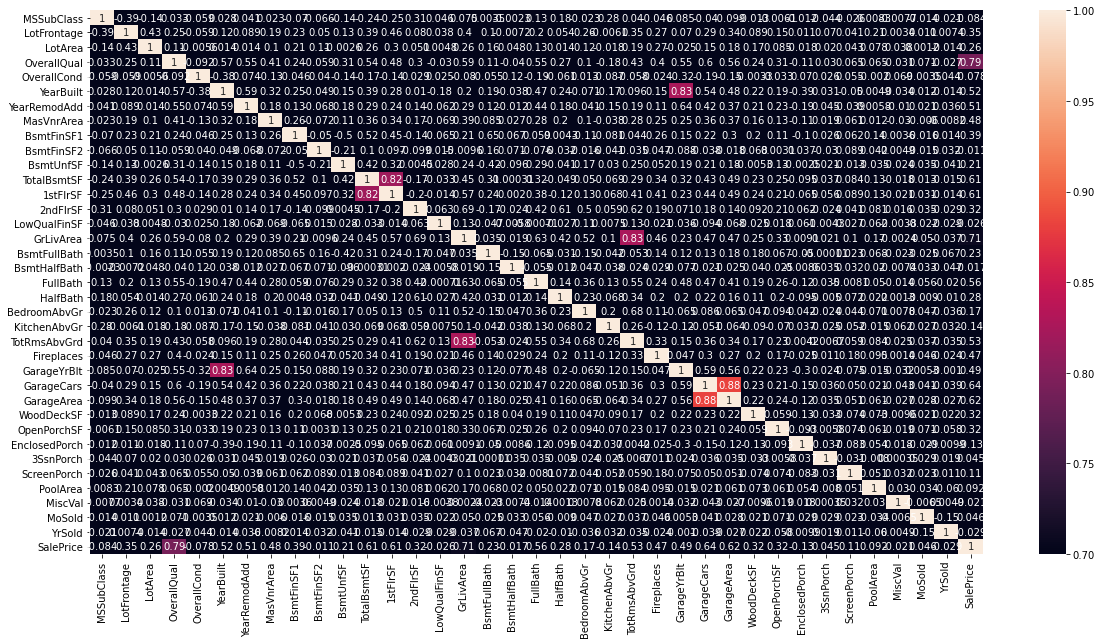

In [127]:
plt.figure(figsize=(20,10))
dataset.corr()
sns.heatmap(dataset.corr(), annot=True, vmin=0.7)

In [128]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [129]:
corr_features = correlation(dataset, 0.7)
len(set(corr_features))

5

In [130]:
corr_features

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'SalePrice', 'TotRmsAbvGrd'}

In [131]:
dataset = dataset.drop(labels=['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'], axis=1)
dataset_test = dataset_test.drop(labels=['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'], axis=1)

In [132]:
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,566,0,1362,1,0,1,1,1,1,TA,Typ,0,NaN,Attchd,Unf,2,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,0,0,1694,1,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,RFn,2,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,983,0,2090,1,0,2,1,3,1,TA,Typ,2,TA,Attchd,RFn,2,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,752,0,1774,0,0,2,0,2,2,TA,Min1,2,TA,Detchd,Unf,2,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,0,0,1077,1,0,1,0,2,2,TA,Typ,2,TA,Attchd,RFn,1,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [133]:
dataset.dtypes.value_counts()

object     43
int64      31
float64     2
dtype: int64

In [134]:
dataset.describe().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [135]:
dataset[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']] = dataset[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']].fillna(value = 0)
dataset_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']] = dataset_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']].fillna(value = 0)

In [136]:
#dataset.info()
dataset.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [137]:
dataset[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']] = dataset[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']].fillna(value = 'Other')
dataset_test[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']] = dataset_test[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']].fillna(value = 'Other')

In [138]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Other,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,Other,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,Other,Other,Other,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Other,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,Other,Other,Other,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Other,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,Other,Other,Other,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Other,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,Other,Other,Other,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Other,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,Other,Other,Other,0,12,2008,WD,Normal,250000


In [139]:
dataset.nunique().sort_values()

CentralAir          2
Street              2
Utilities           2
PavedDrive          3
Alley               3
BsmtHalfBath        3
HalfBath            3
LandSlope           3
GarageFinish        4
ExterQual           4
BsmtFullBath        4
KitchenAbvGr        4
KitchenQual         4
FullBath            4
PoolQC              4
LandContour         4
LotShape            4
Fireplaces          4
BldgType            5
BsmtExposure        5
BsmtCond            5
BsmtQual            5
HeatingQC           5
ExterCond           5
MSZoning            5
MasVnrType          5
GarageCars          5
YrSold              5
LotConfig           5
Fence               5
                 ... 
PoolArea            8
RoofMatl            8
OverallCond         9
Condition1          9
SaleType            9
OverallQual        10
MoSold             12
Exterior1st        15
MSSubClass         15
Exterior2nd        16
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
Neighborhood       25
YearRemodA

In [140]:
np.round((dataset.isnull().sum()/dataset.shape[0])*100,2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
                ... 
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [141]:
# dataset.select_dtypes('object').index
# def column_index(df, query_cols):
#     cols = df.columns.values
#     sidx = np.argsort(cols)
#     return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [142]:
# column_index(dataset, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
#        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
#        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
#        'SaleType', 'SaleCondition'])

In [143]:
# pd.get_dummies(data ='MSSubClass')

In [144]:
X = dataset.drop(columns='SalePrice')
y = dataset['SalePrice']

In [145]:
print(X)
print(y)

      MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
0             60       RL         65.0     8450   Pave  Other      Reg   
1             20       RL         80.0     9600   Pave  Other      Reg   
2             60       RL         68.0    11250   Pave  Other      IR1   
3             70       RL         60.0     9550   Pave  Other      IR1   
4             60       RL         84.0    14260   Pave  Other      IR1   
5             50       RL         85.0    14115   Pave  Other      IR1   
6             20       RL         75.0    10084   Pave  Other      Reg   
7             60       RL          0.0    10382   Pave  Other      IR1   
8             50       RM         51.0     6120   Pave  Other      Reg   
9            190       RL         50.0     7420   Pave  Other      Reg   
10            20       RL         70.0    11200   Pave  Other      Reg   
11            60       RL         85.0    11924   Pave  Other      IR1   
12            20       RL          0.0

In [146]:
# # Encoding the Independent Variable
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [ 1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23,
#        24, 26, 27, 28, 29, 30, 31, 32, 34, 38, 39, 40, 41, 52, 54, 56, 57,
#        59, 62, 63, 64, 71, 72, 73, 77, 78])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [147]:
# train-test split of train data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [148]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)
# print(X)
# print(y)

In [149]:
# difining categorical columns

categorical_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [150]:
# Cat Boost Classifier

from catboost import CatBoostRegressor
regressor = CatBoostRegressor(iterations=3000, learning_rate=0.05, random_state = 2021, loss_function='RMSE')


In [151]:
#training the model

regressor.fit(X_train,y_train, cat_features=categorical_cols, eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 76467.8202758	test: 78831.2181417	best: 78831.2181417 (0)	total: 99.4ms	remaining: 1m 39s
1:	learn: 74038.6105951	test: 76395.6117004	best: 76395.6117004 (1)	total: 170ms	remaining: 1m 25s
2:	learn: 71922.6195455	test: 74327.5498038	best: 74327.5498038 (2)	total: 263ms	remaining: 1m 27s
3:	learn: 69640.0311698	test: 71884.3302522	best: 71884.3302522 (3)	total: 350ms	remaining: 1m 27s
4:	learn: 67599.2069853	test: 69855.3245432	best: 69855.3245432 (4)	total: 431ms	remaining: 1m 25s
5:	learn: 65842.2071237	test: 68149.3046096	best: 68149.3046096 (5)	total: 511ms	remaining: 1m 24s
6:	learn: 63916.0768007	test: 66164.7978411	best: 66164.7978411 (6)	total: 604ms	remaining: 1m 25s
7:	learn: 62173.1453489	test: 64467.6761408	best: 64467.6761408 (7)	total: 678ms	remaining: 1m 24s
8:	learn: 60635.5265075	test: 63018.6228959	best: 63018.6228959 (8)	total: 752ms	remaining: 1m 22s
9:	learn: 59247.3782395	test: 61539.9566651	best: 61539.9566651 (9)	total: 858ms	remaining: 1m 24s
10:	learn

82:	learn: 22532.4738817	test: 30391.4959844	best: 30391.4959844 (82)	total: 6.53s	remaining: 1m 12s
83:	learn: 22428.0839060	test: 30382.3392018	best: 30382.3392018 (83)	total: 6.6s	remaining: 1m 12s
84:	learn: 22360.6862731	test: 30329.2542054	best: 30329.2542054 (84)	total: 6.67s	remaining: 1m 11s
85:	learn: 22257.9589201	test: 30293.6253448	best: 30293.6253448 (85)	total: 6.74s	remaining: 1m 11s
86:	learn: 22144.7812258	test: 30235.4997421	best: 30235.4997421 (86)	total: 6.8s	remaining: 1m 11s
87:	learn: 22044.3504054	test: 30209.8574854	best: 30209.8574854 (87)	total: 6.87s	remaining: 1m 11s
88:	learn: 21968.3702029	test: 30203.2566604	best: 30203.2566604 (88)	total: 6.92s	remaining: 1m 10s
89:	learn: 21887.5362614	test: 30193.0074702	best: 30193.0074702 (89)	total: 6.99s	remaining: 1m 10s
90:	learn: 21819.1553762	test: 30094.6242265	best: 30094.6242265 (90)	total: 7.03s	remaining: 1m 10s
91:	learn: 21713.7827041	test: 30081.1280420	best: 30081.1280420 (91)	total: 7.11s	remaining:

166:	learn: 18128.9343481	test: 28792.8095339	best: 28774.5526654 (164)	total: 12s	remaining: 59.8s
167:	learn: 18123.2838500	test: 28793.0064035	best: 28774.5526654 (164)	total: 12.1s	remaining: 59.8s
168:	learn: 18079.4450093	test: 28753.8454429	best: 28753.8454429 (168)	total: 12.1s	remaining: 59.7s
169:	learn: 18009.7482321	test: 28712.4052915	best: 28712.4052915 (169)	total: 12.2s	remaining: 59.6s
170:	learn: 17951.3305806	test: 28652.5504086	best: 28652.5504086 (170)	total: 12.3s	remaining: 59.5s
171:	learn: 17882.4395417	test: 28635.9996089	best: 28635.9996089 (171)	total: 12.3s	remaining: 59.3s
172:	learn: 17821.9992428	test: 28623.8777485	best: 28623.8777485 (172)	total: 12.4s	remaining: 59.3s
173:	learn: 17774.0455886	test: 28607.8792336	best: 28607.8792336 (173)	total: 12.5s	remaining: 59.3s
174:	learn: 17711.9520430	test: 28577.0838712	best: 28577.0838712 (174)	total: 12.6s	remaining: 59.2s
175:	learn: 17706.9278719	test: 28577.0600574	best: 28577.0600574 (175)	total: 12.6s

248:	learn: 15617.4072694	test: 27971.8121649	best: 27961.1058156 (247)	total: 17.6s	remaining: 53s
249:	learn: 15577.6564620	test: 27968.9073370	best: 27961.1058156 (247)	total: 17.6s	remaining: 52.9s
250:	learn: 15535.5246707	test: 27956.8878038	best: 27956.8878038 (250)	total: 17.7s	remaining: 52.9s
251:	learn: 15500.3685020	test: 27942.0220667	best: 27942.0220667 (251)	total: 17.8s	remaining: 52.8s
252:	learn: 15465.7511316	test: 27930.3884724	best: 27930.3884724 (252)	total: 17.9s	remaining: 52.8s
253:	learn: 15441.7055731	test: 27903.5626094	best: 27903.5626094 (253)	total: 17.9s	remaining: 52.7s
254:	learn: 15436.9533597	test: 27899.8277236	best: 27899.8277236 (254)	total: 18s	remaining: 52.6s
255:	learn: 15432.4621990	test: 27900.4692685	best: 27899.8277236 (254)	total: 18.1s	remaining: 52.6s
256:	learn: 15408.8574857	test: 27900.5205545	best: 27899.8277236 (254)	total: 18.1s	remaining: 52.5s
257:	learn: 15397.6412836	test: 27903.4410308	best: 27899.8277236 (254)	total: 18.2s	r

331:	learn: 14161.6816844	test: 27725.8193750	best: 27719.5771301 (325)	total: 23.5s	remaining: 47.4s
332:	learn: 14130.5109735	test: 27709.4834712	best: 27709.4834712 (332)	total: 23.6s	remaining: 47.3s
333:	learn: 14117.8886174	test: 27705.6487888	best: 27705.6487888 (333)	total: 23.7s	remaining: 47.2s
334:	learn: 14114.3135920	test: 27703.5336483	best: 27703.5336483 (334)	total: 23.7s	remaining: 47.1s
335:	learn: 14103.7754288	test: 27707.3002844	best: 27703.5336483 (334)	total: 23.8s	remaining: 47.1s
336:	learn: 14099.9958348	test: 27713.7754439	best: 27703.5336483 (334)	total: 23.9s	remaining: 47.1s
337:	learn: 14098.2992998	test: 27714.8062805	best: 27703.5336483 (334)	total: 24s	remaining: 47s
338:	learn: 14077.1289330	test: 27719.2238775	best: 27703.5336483 (334)	total: 24s	remaining: 46.9s
339:	learn: 14076.1053216	test: 27719.2385691	best: 27703.5336483 (334)	total: 24.1s	remaining: 46.8s
340:	learn: 14066.6160871	test: 27711.4683581	best: 27703.5336483 (334)	total: 24.2s	rem

413:	learn: 12888.4733006	test: 27498.5348732	best: 27492.0927791 (411)	total: 29.5s	remaining: 41.8s
414:	learn: 12865.5224064	test: 27507.2644993	best: 27492.0927791 (411)	total: 29.6s	remaining: 41.7s
415:	learn: 12851.9294205	test: 27515.8809830	best: 27492.0927791 (411)	total: 29.7s	remaining: 41.6s
416:	learn: 12831.5439923	test: 27519.7872982	best: 27492.0927791 (411)	total: 29.7s	remaining: 41.5s
417:	learn: 12814.1913034	test: 27514.6254304	best: 27492.0927791 (411)	total: 29.8s	remaining: 41.5s
418:	learn: 12793.5796284	test: 27510.9562341	best: 27492.0927791 (411)	total: 29.9s	remaining: 41.4s
419:	learn: 12773.0906196	test: 27504.6425941	best: 27492.0927791 (411)	total: 29.9s	remaining: 41.3s
420:	learn: 12769.4715976	test: 27509.0334034	best: 27492.0927791 (411)	total: 30s	remaining: 41.3s
421:	learn: 12751.7432726	test: 27503.7892800	best: 27492.0927791 (411)	total: 30.1s	remaining: 41.2s
422:	learn: 12746.2732552	test: 27505.8218799	best: 27492.0927791 (411)	total: 30.2s

497:	learn: 11672.7946263	test: 27339.9965386	best: 27339.9965386 (497)	total: 35.6s	remaining: 35.9s
498:	learn: 11659.6793641	test: 27337.4916530	best: 27337.4916530 (498)	total: 35.7s	remaining: 35.8s
499:	learn: 11644.2865645	test: 27337.6079755	best: 27337.4916530 (498)	total: 35.8s	remaining: 35.8s
500:	learn: 11627.6677766	test: 27320.0721399	best: 27320.0721399 (500)	total: 35.8s	remaining: 35.7s
501:	learn: 11613.7880798	test: 27319.0014283	best: 27319.0014283 (501)	total: 35.9s	remaining: 35.6s
502:	learn: 11605.3972546	test: 27321.4179047	best: 27319.0014283 (501)	total: 36s	remaining: 35.5s
503:	learn: 11593.2500863	test: 27317.4419792	best: 27317.4419792 (503)	total: 36s	remaining: 35.5s
504:	learn: 11579.2387076	test: 27321.1500833	best: 27317.4419792 (503)	total: 36.1s	remaining: 35.4s
505:	learn: 11562.0884499	test: 27316.7631684	best: 27316.7631684 (505)	total: 36.2s	remaining: 35.3s
506:	learn: 11559.4583331	test: 27317.3793518	best: 27316.7631684 (505)	total: 36.3s	r

580:	learn: 10652.7991779	test: 27135.8188105	best: 27135.8188105 (580)	total: 42.8s	remaining: 30.8s
581:	learn: 10637.1413053	test: 27134.0184061	best: 27134.0184061 (581)	total: 42.9s	remaining: 30.8s
582:	learn: 10623.9123508	test: 27130.3309285	best: 27130.3309285 (582)	total: 42.9s	remaining: 30.7s
583:	learn: 10622.9761821	test: 27129.6741489	best: 27129.6741489 (583)	total: 43s	remaining: 30.7s
584:	learn: 10613.4053200	test: 27127.6448430	best: 27127.6448430 (584)	total: 43.1s	remaining: 30.6s
585:	learn: 10599.0532723	test: 27128.8925969	best: 27127.6448430 (584)	total: 43.2s	remaining: 30.5s
586:	learn: 10583.5592558	test: 27126.3575397	best: 27126.3575397 (586)	total: 43.3s	remaining: 30.5s
587:	learn: 10571.1153219	test: 27128.8000650	best: 27126.3575397 (586)	total: 43.4s	remaining: 30.4s
588:	learn: 10558.3331291	test: 27123.0515042	best: 27123.0515042 (588)	total: 43.5s	remaining: 30.3s
589:	learn: 10544.7622973	test: 27117.0229021	best: 27117.0229021 (589)	total: 43.5s

662:	learn: 9747.4620353	test: 27016.6250367	best: 27010.7322504 (659)	total: 49.9s	remaining: 25.3s
663:	learn: 9740.1748442	test: 27017.5879613	best: 27010.7322504 (659)	total: 49.9s	remaining: 25.3s
664:	learn: 9737.4380330	test: 27024.1473213	best: 27010.7322504 (659)	total: 50s	remaining: 25.2s
665:	learn: 9721.9472988	test: 27012.9864816	best: 27010.7322504 (659)	total: 50.1s	remaining: 25.1s
666:	learn: 9710.0931675	test: 27008.5184045	best: 27008.5184045 (666)	total: 50.2s	remaining: 25.1s
667:	learn: 9698.0681956	test: 27004.3223082	best: 27004.3223082 (667)	total: 50.3s	remaining: 25s
668:	learn: 9692.1389404	test: 27002.5314128	best: 27002.5314128 (668)	total: 50.4s	remaining: 24.9s
669:	learn: 9691.3156549	test: 27003.9957697	best: 27002.5314128 (668)	total: 50.4s	remaining: 24.8s
670:	learn: 9682.8994660	test: 27001.2107650	best: 27001.2107650 (670)	total: 50.5s	remaining: 24.8s
671:	learn: 9669.2914982	test: 27001.0577547	best: 27001.0577547 (671)	total: 50.6s	remaining: 

744:	learn: 9018.3668989	test: 26912.4006961	best: 26907.3310116 (743)	total: 57.1s	remaining: 19.6s
745:	learn: 9015.8644733	test: 26913.1389107	best: 26907.3310116 (743)	total: 57.2s	remaining: 19.5s
746:	learn: 9005.7250416	test: 26912.4068988	best: 26907.3310116 (743)	total: 57.3s	remaining: 19.4s
747:	learn: 8994.4086976	test: 26909.8173758	best: 26907.3310116 (743)	total: 57.4s	remaining: 19.3s
748:	learn: 8981.0305685	test: 26911.0956979	best: 26907.3310116 (743)	total: 57.5s	remaining: 19.3s
749:	learn: 8966.9305298	test: 26911.8729769	best: 26907.3310116 (743)	total: 57.6s	remaining: 19.2s
750:	learn: 8955.3308824	test: 26911.7614307	best: 26907.3310116 (743)	total: 57.6s	remaining: 19.1s
751:	learn: 8948.5761297	test: 26910.7052732	best: 26907.3310116 (743)	total: 57.7s	remaining: 19s
752:	learn: 8946.2248404	test: 26911.1744367	best: 26907.3310116 (743)	total: 57.8s	remaining: 19s
753:	learn: 8934.5792564	test: 26914.5832393	best: 26907.3310116 (743)	total: 57.9s	remaining: 

827:	learn: 8336.1760725	test: 26849.9567983	best: 26849.9567983 (827)	total: 1m 4s	remaining: 13.4s
828:	learn: 8324.4888527	test: 26843.5909976	best: 26843.5909976 (828)	total: 1m 4s	remaining: 13.3s
829:	learn: 8318.5675797	test: 26835.0498670	best: 26835.0498670 (829)	total: 1m 4s	remaining: 13.2s
830:	learn: 8309.6283080	test: 26835.8210098	best: 26835.0498670 (829)	total: 1m 4s	remaining: 13.1s
831:	learn: 8299.7345805	test: 26836.1714486	best: 26835.0498670 (829)	total: 1m 4s	remaining: 13.1s
832:	learn: 8294.3226036	test: 26837.3737937	best: 26835.0498670 (829)	total: 1m 4s	remaining: 13s
833:	learn: 8291.9092411	test: 26836.6335836	best: 26835.0498670 (829)	total: 1m 4s	remaining: 12.9s
834:	learn: 8285.9355188	test: 26834.9878438	best: 26834.9878438 (834)	total: 1m 4s	remaining: 12.8s
835:	learn: 8285.7467178	test: 26835.3843563	best: 26834.9878438 (834)	total: 1m 5s	remaining: 12.8s
836:	learn: 8276.9639006	test: 26839.6068531	best: 26834.9878438 (834)	total: 1m 5s	remaining

909:	learn: 7841.8220289	test: 26803.4101175	best: 26796.6166371 (908)	total: 1m 11s	remaining: 7.08s
910:	learn: 7836.0905117	test: 26801.2855786	best: 26796.6166371 (908)	total: 1m 11s	remaining: 7s
911:	learn: 7834.8054303	test: 26800.1431570	best: 26796.6166371 (908)	total: 1m 11s	remaining: 6.92s
912:	learn: 7830.8823057	test: 26798.9585840	best: 26796.6166371 (908)	total: 1m 11s	remaining: 6.85s
913:	learn: 7824.7697528	test: 26801.6641105	best: 26796.6166371 (908)	total: 1m 11s	remaining: 6.77s
914:	learn: 7812.4566741	test: 26805.7191541	best: 26796.6166371 (908)	total: 1m 12s	remaining: 6.69s
915:	learn: 7802.6079380	test: 26812.3395937	best: 26796.6166371 (908)	total: 1m 12s	remaining: 6.62s
916:	learn: 7796.5512860	test: 26813.8014248	best: 26796.6166371 (908)	total: 1m 12s	remaining: 6.54s
917:	learn: 7792.8751175	test: 26813.0887247	best: 26796.6166371 (908)	total: 1m 12s	remaining: 6.46s
918:	learn: 7788.5711736	test: 26811.3304085	best: 26796.6166371 (908)	total: 1m 12s	

991:	learn: 7369.0542930	test: 26759.3328745	best: 26756.9196411 (990)	total: 1m 19s	remaining: 637ms
992:	learn: 7367.7535493	test: 26759.5154559	best: 26756.9196411 (990)	total: 1m 19s	remaining: 558ms
993:	learn: 7358.8708270	test: 26753.7646058	best: 26753.7646058 (993)	total: 1m 19s	remaining: 478ms
994:	learn: 7347.3868581	test: 26755.2767586	best: 26753.7646058 (993)	total: 1m 19s	remaining: 398ms
995:	learn: 7344.5656376	test: 26753.7212621	best: 26753.7212621 (995)	total: 1m 19s	remaining: 318ms
996:	learn: 7333.4246072	test: 26749.5855625	best: 26749.5855625 (996)	total: 1m 19s	remaining: 239ms
997:	learn: 7323.2555124	test: 26746.2492323	best: 26746.2492323 (997)	total: 1m 19s	remaining: 159ms
998:	learn: 7320.8274261	test: 26746.0761952	best: 26746.0761952 (998)	total: 1m 19s	remaining: 79.6ms
999:	learn: 7320.0751236	test: 26746.2215842	best: 26746.0761952 (998)	total: 1m 19s	remaining: 0us

bestTest = 26746.0762
bestIteration = 998

Shrink model to first 999 iterations.


In [152]:
# defining model to train with complete train dataset

classifier_2 = CatBoostRegressor(iterations=3000, learning_rate=0.05, random_state = 2021, loss_function='RMSE')

In [153]:
## training the model with complete train dataset

classifier_2.fit(X,y, cat_features=categorical_cols, eval_set=(X,y),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 76784.8415034	test: 76787.1465848	best: 76787.1465848 (0)	total: 85.5ms	remaining: 4m 16s
1:	learn: 74374.5888001	test: 74376.9385427	best: 74376.9385427 (1)	total: 174ms	remaining: 4m 20s
2:	learn: 72182.8031331	test: 72185.5900503	best: 72185.5900503 (2)	total: 249ms	remaining: 4m 8s
3:	learn: 70155.9416992	test: 70093.7124848	best: 70093.7124848 (3)	total: 347ms	remaining: 4m 20s
4:	learn: 68015.2974982	test: 67940.0426547	best: 67940.0426547 (4)	total: 429ms	remaining: 4m 17s
5:	learn: 65902.5140405	test: 65824.0289895	best: 65824.0289895 (5)	total: 515ms	remaining: 4m 17s
6:	learn: 63974.6951509	test: 63897.1328192	best: 63897.1328192 (6)	total: 592ms	remaining: 4m 13s
7:	learn: 62112.8684838	test: 62035.7503614	best: 62035.7503614 (7)	total: 659ms	remaining: 4m 6s
8:	learn: 60302.5503880	test: 60226.9103740	best: 60226.9103740 (8)	total: 730ms	remaining: 4m 2s
9:	learn: 58680.9628493	test: 58606.8908944	best: 58606.8908944 (9)	total: 798ms	remaining: 3m 58s
10:	learn: 5

82:	learn: 22982.9952892	test: 23075.6571785	best: 23075.6571785 (82)	total: 6.56s	remaining: 3m 50s
83:	learn: 22886.8796031	test: 22980.5128782	best: 22980.5128782 (83)	total: 6.64s	remaining: 3m 50s
84:	learn: 22772.3895609	test: 22873.9859807	best: 22873.9859807 (84)	total: 6.74s	remaining: 3m 51s
85:	learn: 22637.8633123	test: 22753.3452909	best: 22753.3452909 (85)	total: 6.81s	remaining: 3m 50s
86:	learn: 22519.4688311	test: 22636.6847705	best: 22636.6847705 (86)	total: 6.88s	remaining: 3m 50s
87:	learn: 22475.9633192	test: 22602.7776176	best: 22602.7776176 (87)	total: 6.96s	remaining: 3m 50s
88:	learn: 22411.4268650	test: 22537.1076963	best: 22537.1076963 (88)	total: 7.04s	remaining: 3m 50s
89:	learn: 22334.6214006	test: 22465.1646399	best: 22465.1646399 (89)	total: 7.12s	remaining: 3m 50s
90:	learn: 22250.9299109	test: 22381.2056736	best: 22381.2056736 (90)	total: 7.2s	remaining: 3m 50s
91:	learn: 22140.3851842	test: 22274.6098501	best: 22274.6098501 (91)	total: 7.27s	remaining

165:	learn: 18323.6146164	test: 18571.3938542	best: 18571.3938542 (165)	total: 12.9s	remaining: 3m 41s
166:	learn: 18275.9638953	test: 18541.8364449	best: 18541.8364449 (166)	total: 13s	remaining: 3m 41s
167:	learn: 18230.7623055	test: 18495.6349738	best: 18495.6349738 (167)	total: 13.1s	remaining: 3m 40s
168:	learn: 18197.5044843	test: 18462.9755651	best: 18462.9755651 (168)	total: 13.2s	remaining: 3m 40s
169:	learn: 18156.8039038	test: 18429.9211125	best: 18429.9211125 (169)	total: 13.2s	remaining: 3m 40s
170:	learn: 18116.6830976	test: 18393.0797452	best: 18393.0797452 (170)	total: 13.3s	remaining: 3m 40s
171:	learn: 18084.9951264	test: 18360.3074781	best: 18360.3074781 (171)	total: 13.4s	remaining: 3m 40s
172:	learn: 18080.4592108	test: 18354.0879215	best: 18354.0879215 (172)	total: 13.5s	remaining: 3m 40s
173:	learn: 18052.2625920	test: 18324.7665232	best: 18324.7665232 (173)	total: 13.6s	remaining: 3m 40s
174:	learn: 18036.9436853	test: 18307.3805854	best: 18307.3805854 (174)	tot

247:	learn: 16031.7775617	test: 16571.2861465	best: 16571.2861465 (247)	total: 19.9s	remaining: 3m 40s
248:	learn: 16019.3621455	test: 16557.2395810	best: 16557.2395810 (248)	total: 20s	remaining: 3m 40s
249:	learn: 15989.7968804	test: 16533.5975972	best: 16533.5975972 (249)	total: 20s	remaining: 3m 40s
250:	learn: 15966.1658265	test: 16511.7743519	best: 16511.7743519 (250)	total: 20.1s	remaining: 3m 40s
251:	learn: 15936.6075568	test: 16482.2333813	best: 16482.2333813 (251)	total: 20.2s	remaining: 3m 40s
252:	learn: 15918.3088521	test: 16475.8818515	best: 16475.8818515 (252)	total: 20.3s	remaining: 3m 40s
253:	learn: 15905.1982189	test: 16468.3638212	best: 16468.3638212 (253)	total: 20.4s	remaining: 3m 40s
254:	learn: 15868.7954546	test: 16438.0291230	best: 16438.0291230 (254)	total: 20.5s	remaining: 3m 40s
255:	learn: 15849.9223932	test: 16426.3940196	best: 16426.3940196 (255)	total: 20.5s	remaining: 3m 40s
256:	learn: 15815.7804680	test: 16396.0133111	best: 16396.0133111 (256)	total

328:	learn: 14291.0939174	test: 15113.8212933	best: 15113.8212933 (328)	total: 28.5s	remaining: 3m 51s
329:	learn: 14286.6781182	test: 15113.7729736	best: 15113.7729736 (329)	total: 28.6s	remaining: 3m 51s
330:	learn: 14281.3953400	test: 15108.2441276	best: 15108.2441276 (330)	total: 28.7s	remaining: 3m 51s
331:	learn: 14274.1705207	test: 15104.4645061	best: 15104.4645061 (331)	total: 28.8s	remaining: 3m 51s
332:	learn: 14247.5011670	test: 15079.2485853	best: 15079.2485853 (332)	total: 28.9s	remaining: 3m 51s
333:	learn: 14230.7114805	test: 15075.5079630	best: 15075.5079630 (333)	total: 29s	remaining: 3m 51s
334:	learn: 14205.1307787	test: 15048.9209886	best: 15048.9209886 (334)	total: 29.1s	remaining: 3m 51s
335:	learn: 14203.5507245	test: 15047.1343402	best: 15047.1343402 (335)	total: 29.2s	remaining: 3m 51s
336:	learn: 14179.6670135	test: 15026.3369531	best: 15026.3369531 (336)	total: 29.3s	remaining: 3m 51s
337:	learn: 14168.2407733	test: 15019.5655347	best: 15019.5655347 (337)	tot

410:	learn: 13009.4875003	test: 14116.4742187	best: 14116.4742187 (410)	total: 35.8s	remaining: 3m 45s
411:	learn: 12999.7716729	test: 14106.4443347	best: 14106.4443347 (411)	total: 35.9s	remaining: 3m 45s
412:	learn: 12984.9921249	test: 14102.3148068	best: 14102.3148068 (412)	total: 36s	remaining: 3m 45s
413:	learn: 12968.4076526	test: 14088.9656708	best: 14088.9656708 (413)	total: 36.1s	remaining: 3m 45s
414:	learn: 12962.8404966	test: 14084.8989636	best: 14084.8989636 (414)	total: 36.2s	remaining: 3m 45s
415:	learn: 12953.6951422	test: 14076.5719913	best: 14076.5719913 (415)	total: 36.2s	remaining: 3m 45s
416:	learn: 12952.1183044	test: 14075.3013339	best: 14075.3013339 (416)	total: 36.3s	remaining: 3m 45s
417:	learn: 12920.9386898	test: 14043.1667027	best: 14043.1667027 (417)	total: 36.4s	remaining: 3m 44s
418:	learn: 12916.9700465	test: 14039.3979311	best: 14039.3979311 (418)	total: 36.5s	remaining: 3m 44s
419:	learn: 12914.5804839	test: 14039.3994366	best: 14039.3979311 (418)	tot

490:	learn: 11880.3876017	test: 13231.0452801	best: 13231.0452801 (490)	total: 42.4s	remaining: 3m 36s
491:	learn: 11871.0512165	test: 13228.6363370	best: 13228.6363370 (491)	total: 42.5s	remaining: 3m 36s
492:	learn: 11867.4677745	test: 13224.5280470	best: 13224.5280470 (492)	total: 42.6s	remaining: 3m 36s
493:	learn: 11854.3416722	test: 13219.2157758	best: 13219.2157758 (493)	total: 42.7s	remaining: 3m 36s
494:	learn: 11820.2959121	test: 13186.5615341	best: 13186.5615341 (494)	total: 42.8s	remaining: 3m 36s
495:	learn: 11802.0615444	test: 13177.0930520	best: 13177.0930520 (495)	total: 42.8s	remaining: 3m 36s
496:	learn: 11783.4922936	test: 13159.9332782	best: 13159.9332782 (496)	total: 42.9s	remaining: 3m 36s
497:	learn: 11779.1873209	test: 13159.1720829	best: 13159.1720829 (497)	total: 43s	remaining: 3m 35s
498:	learn: 11754.4608879	test: 13132.9697865	best: 13132.9697865 (498)	total: 43.1s	remaining: 3m 35s
499:	learn: 11735.1023212	test: 13113.6630690	best: 13113.6630690 (499)	tot

570:	learn: 10934.9432793	test: 12486.7097089	best: 12486.7097089 (570)	total: 49s	remaining: 3m 28s
571:	learn: 10924.0552154	test: 12476.4241272	best: 12476.4241272 (571)	total: 49s	remaining: 3m 28s
572:	learn: 10913.7287558	test: 12466.6082605	best: 12466.6082605 (572)	total: 49.1s	remaining: 3m 28s
573:	learn: 10910.1256464	test: 12462.5538954	best: 12462.5538954 (573)	total: 49.2s	remaining: 3m 27s
574:	learn: 10903.8311439	test: 12457.3994485	best: 12457.3994485 (574)	total: 49.3s	remaining: 3m 27s
575:	learn: 10891.8760671	test: 12451.0374772	best: 12451.0374772 (575)	total: 49.4s	remaining: 3m 27s
576:	learn: 10874.4930473	test: 12432.9305544	best: 12432.9305544 (576)	total: 49.5s	remaining: 3m 27s
577:	learn: 10873.0409910	test: 12432.9662572	best: 12432.9305544 (576)	total: 49.5s	remaining: 3m 27s
578:	learn: 10862.9582587	test: 12427.1445654	best: 12427.1445654 (578)	total: 49.6s	remaining: 3m 27s
579:	learn: 10838.0009067	test: 12401.8118422	best: 12401.8118422 (579)	total

652:	learn: 10102.0467122	test: 11830.1883454	best: 11830.1883454 (652)	total: 55.8s	remaining: 3m 20s
653:	learn: 10089.5539236	test: 11817.9056868	best: 11817.9056868 (653)	total: 55.9s	remaining: 3m 20s
654:	learn: 10078.9544837	test: 11808.9847845	best: 11808.9847845 (654)	total: 56s	remaining: 3m 20s
655:	learn: 10077.8782032	test: 11808.2205047	best: 11808.2205047 (655)	total: 56s	remaining: 3m 20s
656:	learn: 10067.5734303	test: 11801.9929463	best: 11801.9929463 (656)	total: 56.1s	remaining: 3m 20s
657:	learn: 10063.4374746	test: 11800.2639436	best: 11800.2639436 (657)	total: 56.2s	remaining: 3m 20s
658:	learn: 10061.0207565	test: 11797.4407036	best: 11797.4407036 (658)	total: 56.3s	remaining: 3m 20s
659:	learn: 10053.3964929	test: 11788.6444934	best: 11788.6444934 (659)	total: 56.4s	remaining: 3m 19s
660:	learn: 10051.8885421	test: 11787.2191877	best: 11787.2191877 (660)	total: 56.5s	remaining: 3m 19s
661:	learn: 10042.8282953	test: 11783.3073995	best: 11783.3073995 (661)	total

735:	learn: 9375.7143289	test: 11229.8184977	best: 11229.8184977 (735)	total: 1m 2s	remaining: 3m 12s
736:	learn: 9369.2177819	test: 11226.4045194	best: 11226.4045194 (736)	total: 1m 2s	remaining: 3m 12s
737:	learn: 9363.3567367	test: 11222.8273292	best: 11222.8273292 (737)	total: 1m 2s	remaining: 3m 12s
738:	learn: 9353.1477777	test: 11212.4468239	best: 11212.4468239 (738)	total: 1m 2s	remaining: 3m 12s
739:	learn: 9340.0685989	test: 11211.4560266	best: 11211.4560266 (739)	total: 1m 2s	remaining: 3m 12s
740:	learn: 9324.1311813	test: 11195.7825761	best: 11195.7825761 (740)	total: 1m 2s	remaining: 3m 12s
741:	learn: 9318.4389425	test: 11195.1160434	best: 11195.1160434 (741)	total: 1m 3s	remaining: 3m 12s
742:	learn: 9315.1947920	test: 11194.2725131	best: 11194.2725131 (742)	total: 1m 3s	remaining: 3m 11s
743:	learn: 9308.7542826	test: 11188.9331595	best: 11188.9331595 (743)	total: 1m 3s	remaining: 3m 11s
744:	learn: 9304.5898517	test: 11189.0871025	best: 11188.9331595 (743)	total: 1m 3

816:	learn: 8852.0417186	test: 10844.6480780	best: 10844.6480780 (816)	total: 1m 9s	remaining: 3m 5s
817:	learn: 8845.1904842	test: 10840.5701544	best: 10840.5701544 (817)	total: 1m 9s	remaining: 3m 5s
818:	learn: 8833.1018300	test: 10831.5771069	best: 10831.5771069 (818)	total: 1m 9s	remaining: 3m 5s
819:	learn: 8825.8449934	test: 10826.8008175	best: 10826.8008175 (819)	total: 1m 9s	remaining: 3m 5s
820:	learn: 8816.1362060	test: 10820.9393813	best: 10820.9393813 (820)	total: 1m 9s	remaining: 3m 5s
821:	learn: 8808.7525879	test: 10816.3171531	best: 10816.3171531 (821)	total: 1m 9s	remaining: 3m 5s
822:	learn: 8799.5799379	test: 10808.4550214	best: 10808.4550214 (822)	total: 1m 10s	remaining: 3m 5s
823:	learn: 8798.5019034	test: 10807.3453249	best: 10807.3453249 (823)	total: 1m 10s	remaining: 3m 5s
824:	learn: 8788.0468446	test: 10800.1253338	best: 10800.1253338 (824)	total: 1m 10s	remaining: 3m 5s
825:	learn: 8786.4716030	test: 10798.9210943	best: 10798.9210943 (825)	total: 1m 10s	rem

898:	learn: 8295.9550197	test: 10446.0867603	best: 10446.0867603 (898)	total: 1m 17s	remaining: 2m 59s
899:	learn: 8292.3647562	test: 10443.1996232	best: 10443.1996232 (899)	total: 1m 17s	remaining: 2m 59s
900:	learn: 8291.3888406	test: 10443.1613333	best: 10443.1613333 (900)	total: 1m 17s	remaining: 2m 59s
901:	learn: 8286.9985848	test: 10439.3382748	best: 10439.3382748 (901)	total: 1m 17s	remaining: 2m 59s
902:	learn: 8277.3205823	test: 10433.5033100	best: 10433.5033100 (902)	total: 1m 17s	remaining: 2m 59s
903:	learn: 8259.9015611	test: 10417.9931794	best: 10417.9931794 (903)	total: 1m 17s	remaining: 2m 59s
904:	learn: 8256.0666676	test: 10414.8350785	best: 10414.8350785 (904)	total: 1m 17s	remaining: 2m 59s
905:	learn: 8250.5399557	test: 10412.1882083	best: 10412.1882083 (905)	total: 1m 17s	remaining: 2m 59s
906:	learn: 8241.1903918	test: 10402.0156013	best: 10402.0156013 (906)	total: 1m 17s	remaining: 2m 59s
907:	learn: 8236.2132726	test: 10398.8606052	best: 10398.8606052 (907)	to

979:	learn: 7803.6086441	test: 10087.3644053	best: 10087.3644053 (979)	total: 1m 24s	remaining: 2m 55s
980:	learn: 7790.6104002	test: 10074.9996734	best: 10074.9996734 (980)	total: 1m 25s	remaining: 2m 54s
981:	learn: 7786.6302014	test: 10072.8908527	best: 10072.8908527 (981)	total: 1m 25s	remaining: 2m 54s
982:	learn: 7782.0306004	test: 10070.1490312	best: 10070.1490312 (982)	total: 1m 25s	remaining: 2m 54s
983:	learn: 7777.4330331	test: 10066.2423372	best: 10066.2423372 (983)	total: 1m 25s	remaining: 2m 54s
984:	learn: 7775.9213025	test: 10065.1555940	best: 10065.1555940 (984)	total: 1m 25s	remaining: 2m 54s
985:	learn: 7773.6557299	test: 10062.7023907	best: 10062.7023907 (985)	total: 1m 25s	remaining: 2m 54s
986:	learn: 7771.3651349	test: 10061.0998389	best: 10061.0998389 (986)	total: 1m 25s	remaining: 2m 54s
987:	learn: 7760.6116394	test: 10055.6369889	best: 10055.6369889 (987)	total: 1m 25s	remaining: 2m 54s
988:	learn: 7754.1754324	test: 10051.8627027	best: 10051.8627027 (988)	to

1059:	learn: 7396.7537701	test: 9802.3469574	best: 9802.3469574 (1059)	total: 1m 32s	remaining: 2m 50s
1060:	learn: 7390.7447152	test: 9798.8653119	best: 9798.8653119 (1060)	total: 1m 33s	remaining: 2m 50s
1061:	learn: 7379.5637791	test: 9788.1970308	best: 9788.1970308 (1061)	total: 1m 33s	remaining: 2m 49s
1062:	learn: 7379.2589655	test: 9788.1298025	best: 9788.1298025 (1062)	total: 1m 33s	remaining: 2m 50s
1063:	learn: 7375.7338132	test: 9785.6163230	best: 9785.6163230 (1063)	total: 1m 33s	remaining: 2m 49s
1064:	learn: 7374.2181461	test: 9784.5366250	best: 9784.5366250 (1064)	total: 1m 33s	remaining: 2m 49s
1065:	learn: 7369.7355999	test: 9784.1047817	best: 9784.1047817 (1065)	total: 1m 33s	remaining: 2m 49s
1066:	learn: 7364.1119619	test: 9780.2813472	best: 9780.2813472 (1066)	total: 1m 33s	remaining: 2m 49s
1067:	learn: 7362.5707577	test: 9779.9507641	best: 9779.9507641 (1067)	total: 1m 33s	remaining: 2m 49s
1068:	learn: 7360.0335493	test: 9778.6648134	best: 9778.6648134 (1068)	to

1140:	learn: 6969.5094594	test: 9488.6763244	best: 9488.6763244 (1140)	total: 1m 40s	remaining: 2m 44s
1141:	learn: 6965.4856270	test: 9487.6543375	best: 9487.6543375 (1141)	total: 1m 41s	remaining: 2m 44s
1142:	learn: 6964.2300521	test: 9485.9435506	best: 9485.9435506 (1142)	total: 1m 41s	remaining: 2m 44s
1143:	learn: 6961.4547768	test: 9485.9100182	best: 9485.9100182 (1143)	total: 1m 41s	remaining: 2m 44s
1144:	learn: 6956.9329631	test: 9484.5910742	best: 9484.5910742 (1144)	total: 1m 41s	remaining: 2m 44s
1145:	learn: 6955.1133571	test: 9482.5989264	best: 9482.5989264 (1145)	total: 1m 41s	remaining: 2m 44s
1146:	learn: 6951.1213048	test: 9479.5159257	best: 9479.5159257 (1146)	total: 1m 41s	remaining: 2m 44s
1147:	learn: 6948.7947074	test: 9478.5928267	best: 9478.5928267 (1147)	total: 1m 41s	remaining: 2m 43s
1148:	learn: 6947.7169666	test: 9477.7893451	best: 9477.7893451 (1148)	total: 1m 41s	remaining: 2m 43s
1149:	learn: 6941.6827092	test: 9472.9786338	best: 9472.9786338 (1149)	to

1221:	learn: 6629.3353207	test: 9261.2242902	best: 9261.2242902 (1221)	total: 1m 49s	remaining: 2m 39s
1222:	learn: 6628.9711770	test: 9261.3416761	best: 9261.2242902 (1221)	total: 1m 50s	remaining: 2m 39s
1223:	learn: 6625.0272316	test: 9257.3682374	best: 9257.3682374 (1223)	total: 1m 50s	remaining: 2m 39s
1224:	learn: 6621.3899849	test: 9256.1355538	best: 9256.1355538 (1224)	total: 1m 50s	remaining: 2m 39s
1225:	learn: 6616.3067440	test: 9252.5484563	best: 9252.5484563 (1225)	total: 1m 50s	remaining: 2m 39s
1226:	learn: 6612.8381998	test: 9251.0475934	best: 9251.0475934 (1226)	total: 1m 50s	remaining: 2m 39s
1227:	learn: 6609.1014271	test: 9248.9365345	best: 9248.9365345 (1227)	total: 1m 50s	remaining: 2m 39s
1228:	learn: 6608.3771942	test: 9249.0383168	best: 9248.9365345 (1227)	total: 1m 50s	remaining: 2m 39s
1229:	learn: 6603.9958314	test: 9245.1186466	best: 9245.1186466 (1229)	total: 1m 50s	remaining: 2m 39s
1230:	learn: 6600.7802995	test: 9243.1289273	best: 9243.1289273 (1230)	to

1302:	learn: 6307.9433210	test: 9038.7730898	best: 9038.7730898 (1302)	total: 2m	remaining: 2m 37s
1303:	learn: 6306.5340305	test: 9037.8420597	best: 9037.8420597 (1303)	total: 2m	remaining: 2m 37s
1304:	learn: 6306.3393395	test: 9037.6199236	best: 9037.6199236 (1304)	total: 2m 1s	remaining: 2m 37s
1305:	learn: 6296.4696224	test: 9029.7368050	best: 9029.7368050 (1305)	total: 2m 1s	remaining: 2m 37s
1306:	learn: 6288.1803423	test: 9022.1586791	best: 9022.1586791 (1306)	total: 2m 1s	remaining: 2m 37s
1307:	learn: 6284.2714938	test: 9020.1987948	best: 9020.1987948 (1307)	total: 2m 1s	remaining: 2m 36s
1308:	learn: 6281.3232125	test: 9020.0405647	best: 9020.0405647 (1308)	total: 2m 1s	remaining: 2m 36s
1309:	learn: 6280.5155196	test: 9019.3730849	best: 9019.3730849 (1309)	total: 2m 1s	remaining: 2m 36s
1310:	learn: 6279.8070262	test: 9019.3056155	best: 9019.3056155 (1310)	total: 2m 1s	remaining: 2m 36s
1311:	learn: 6272.8451104	test: 9015.6481796	best: 9015.6481796 (1311)	total: 2m 1s	rema

1384:	learn: 6067.2902545	test: 8881.4198493	best: 8881.4198493 (1384)	total: 2m 9s	remaining: 2m 30s
1385:	learn: 6064.8003590	test: 8879.9162005	best: 8879.9162005 (1385)	total: 2m 9s	remaining: 2m 30s
1386:	learn: 6063.5750566	test: 8879.6077380	best: 8879.6077380 (1386)	total: 2m 9s	remaining: 2m 30s
1387:	learn: 6057.3696597	test: 8875.5485518	best: 8875.5485518 (1387)	total: 2m 9s	remaining: 2m 30s
1388:	learn: 6056.5364754	test: 8875.6085089	best: 8875.5485518 (1387)	total: 2m 9s	remaining: 2m 30s
1389:	learn: 6056.2783949	test: 8875.7127923	best: 8875.5485518 (1387)	total: 2m 9s	remaining: 2m 30s
1390:	learn: 6053.4805493	test: 8873.8232772	best: 8873.8232772 (1390)	total: 2m 9s	remaining: 2m 30s
1391:	learn: 6048.4448923	test: 8873.5018986	best: 8873.5018986 (1391)	total: 2m 9s	remaining: 2m 30s
1392:	learn: 6045.8418775	test: 8873.2019008	best: 8873.2019008 (1392)	total: 2m 10s	remaining: 2m 30s
1393:	learn: 6041.2222956	test: 8868.4754225	best: 8868.4754225 (1393)	total: 2m 

1465:	learn: 5775.8818371	test: 8704.7886271	best: 8704.7886271 (1465)	total: 2m 16s	remaining: 2m 23s
1466:	learn: 5768.1290098	test: 8696.9769474	best: 8696.9769474 (1466)	total: 2m 16s	remaining: 2m 23s
1467:	learn: 5767.1449773	test: 8695.8300443	best: 8695.8300443 (1467)	total: 2m 17s	remaining: 2m 22s
1468:	learn: 5763.3338804	test: 8692.2686976	best: 8692.2686976 (1468)	total: 2m 17s	remaining: 2m 22s
1469:	learn: 5760.3212912	test: 8691.4862692	best: 8691.4862692 (1469)	total: 2m 17s	remaining: 2m 22s
1470:	learn: 5757.6846887	test: 8690.3443970	best: 8690.3443970 (1470)	total: 2m 17s	remaining: 2m 22s
1471:	learn: 5752.4306691	test: 8685.1030178	best: 8685.1030178 (1471)	total: 2m 17s	remaining: 2m 22s
1472:	learn: 5748.9825904	test: 8682.9915110	best: 8682.9915110 (1472)	total: 2m 17s	remaining: 2m 22s
1473:	learn: 5748.7677620	test: 8683.1904217	best: 8682.9915110 (1472)	total: 2m 17s	remaining: 2m 22s
1474:	learn: 5744.9388499	test: 8680.4956586	best: 8680.4956586 (1474)	to

1547:	learn: 5455.0801145	test: 8466.3739713	best: 8466.3739713 (1547)	total: 2m 24s	remaining: 2m 15s
1548:	learn: 5450.0735791	test: 8461.7344115	best: 8461.7344115 (1548)	total: 2m 24s	remaining: 2m 15s
1549:	learn: 5446.0382599	test: 8459.3778265	best: 8459.3778265 (1549)	total: 2m 24s	remaining: 2m 15s
1550:	learn: 5443.2188582	test: 8458.4576834	best: 8458.4576834 (1550)	total: 2m 24s	remaining: 2m 15s
1551:	learn: 5441.3668519	test: 8457.3730502	best: 8457.3730502 (1551)	total: 2m 24s	remaining: 2m 15s
1552:	learn: 5439.2006177	test: 8456.1105696	best: 8456.1105696 (1552)	total: 2m 24s	remaining: 2m 15s
1553:	learn: 5435.8696407	test: 8453.6751376	best: 8453.6751376 (1553)	total: 2m 25s	remaining: 2m 14s
1554:	learn: 5434.6437376	test: 8453.4894084	best: 8453.4894084 (1554)	total: 2m 25s	remaining: 2m 14s
1555:	learn: 5433.4322625	test: 8452.4885504	best: 8452.4885504 (1555)	total: 2m 25s	remaining: 2m 14s
1556:	learn: 5425.9087091	test: 8443.8543312	best: 8443.8543312 (1556)	to

1628:	learn: 5231.6064086	test: 8326.0599212	best: 8326.0599212 (1628)	total: 2m 31s	remaining: 2m 7s
1629:	learn: 5226.9444492	test: 8322.6780563	best: 8322.6780563 (1629)	total: 2m 32s	remaining: 2m 7s
1630:	learn: 5225.1759426	test: 8322.6488553	best: 8322.6488553 (1630)	total: 2m 32s	remaining: 2m 7s
1631:	learn: 5224.1400280	test: 8322.2170676	best: 8322.2170676 (1631)	total: 2m 32s	remaining: 2m 7s
1632:	learn: 5221.2270533	test: 8320.1811883	best: 8320.1811883 (1632)	total: 2m 32s	remaining: 2m 7s
1633:	learn: 5220.1882455	test: 8320.7760110	best: 8320.1811883 (1632)	total: 2m 32s	remaining: 2m 7s
1634:	learn: 5215.1232756	test: 8316.6709947	best: 8316.6709947 (1634)	total: 2m 32s	remaining: 2m 7s
1635:	learn: 5214.1363628	test: 8316.1853671	best: 8316.1853671 (1635)	total: 2m 32s	remaining: 2m 7s
1636:	learn: 5206.1397394	test: 8307.3008600	best: 8307.3008600 (1636)	total: 2m 32s	remaining: 2m 7s
1637:	learn: 5204.9038336	test: 8306.7472051	best: 8306.7472051 (1637)	total: 2m 3

1709:	learn: 5013.1448616	test: 8177.6796636	best: 8177.6796636 (1709)	total: 2m 39s	remaining: 2m
1710:	learn: 5010.1673410	test: 8177.0666937	best: 8177.0666937 (1710)	total: 2m 39s	remaining: 2m
1711:	learn: 5007.3879030	test: 8175.6852675	best: 8175.6852675 (1711)	total: 2m 39s	remaining: 2m
1712:	learn: 5000.1694490	test: 8168.7193372	best: 8168.7193372 (1712)	total: 2m 39s	remaining: 2m
1713:	learn: 4997.7356100	test: 8166.8043260	best: 8166.8043260 (1713)	total: 2m 39s	remaining: 1m 59s
1714:	learn: 4992.9088473	test: 8164.7384294	best: 8164.7384294 (1714)	total: 2m 39s	remaining: 1m 59s
1715:	learn: 4987.2903254	test: 8160.1794833	best: 8160.1794833 (1715)	total: 2m 40s	remaining: 1m 59s
1716:	learn: 4986.2814204	test: 8159.2769708	best: 8159.2769708 (1716)	total: 2m 40s	remaining: 1m 59s
1717:	learn: 4979.0206647	test: 8154.1721447	best: 8154.1721447 (1717)	total: 2m 40s	remaining: 1m 59s
1718:	learn: 4977.9128337	test: 8152.8783972	best: 8152.8783972 (1718)	total: 2m 40s	rema

1790:	learn: 4802.1874702	test: 8046.4613424	best: 8046.4613424 (1790)	total: 2m 46s	remaining: 1m 52s
1791:	learn: 4799.6953263	test: 8043.5550967	best: 8043.5550967 (1791)	total: 2m 47s	remaining: 1m 52s
1792:	learn: 4798.4437716	test: 8042.3547302	best: 8042.3547302 (1792)	total: 2m 47s	remaining: 1m 52s
1793:	learn: 4796.0649417	test: 8041.4657747	best: 8041.4657747 (1793)	total: 2m 47s	remaining: 1m 52s
1794:	learn: 4792.8564737	test: 8039.3486472	best: 8039.3486472 (1794)	total: 2m 47s	remaining: 1m 52s
1795:	learn: 4791.4909243	test: 8039.2815781	best: 8039.2815781 (1795)	total: 2m 47s	remaining: 1m 52s
1796:	learn: 4787.1313367	test: 8036.1205915	best: 8036.1205915 (1796)	total: 2m 47s	remaining: 1m 52s
1797:	learn: 4785.6883949	test: 8035.4794204	best: 8035.4794204 (1797)	total: 2m 47s	remaining: 1m 52s
1798:	learn: 4783.8554139	test: 8033.3365232	best: 8033.3365232 (1798)	total: 2m 47s	remaining: 1m 51s
1799:	learn: 4782.1705790	test: 8033.3030019	best: 8033.3030019 (1799)	to

1872:	learn: 4616.4951241	test: 7935.6582872	best: 7935.6582872 (1872)	total: 2m 54s	remaining: 1m 45s
1873:	learn: 4615.7501683	test: 7935.8622432	best: 7935.6582872 (1872)	total: 2m 54s	remaining: 1m 44s
1874:	learn: 4612.0611875	test: 7934.0504941	best: 7934.0504941 (1874)	total: 2m 54s	remaining: 1m 44s
1875:	learn: 4608.2093621	test: 7931.0497278	best: 7931.0497278 (1875)	total: 2m 54s	remaining: 1m 44s
1876:	learn: 4606.0000292	test: 7930.9255145	best: 7930.9255145 (1876)	total: 2m 54s	remaining: 1m 44s
1877:	learn: 4603.1007848	test: 7930.2250996	best: 7930.2250996 (1877)	total: 2m 55s	remaining: 1m 44s
1878:	learn: 4597.4775898	test: 7925.3124472	best: 7925.3124472 (1878)	total: 2m 55s	remaining: 1m 44s
1879:	learn: 4596.0662173	test: 7924.7419367	best: 7924.7419367 (1879)	total: 2m 55s	remaining: 1m 44s
1880:	learn: 4593.2458653	test: 7923.1105596	best: 7923.1105596 (1880)	total: 2m 55s	remaining: 1m 44s
1881:	learn: 4591.4369680	test: 7922.6426586	best: 7922.6426586 (1881)	to

1954:	learn: 4405.1716532	test: 7809.9748390	best: 7809.9748390 (1954)	total: 3m 2s	remaining: 1m 37s
1955:	learn: 4403.3592775	test: 7808.4709274	best: 7808.4709274 (1955)	total: 3m 2s	remaining: 1m 37s
1956:	learn: 4400.6595980	test: 7806.9040580	best: 7806.9040580 (1956)	total: 3m 2s	remaining: 1m 37s
1957:	learn: 4397.3018404	test: 7803.8690170	best: 7803.8690170 (1957)	total: 3m 2s	remaining: 1m 37s
1958:	learn: 4395.3287060	test: 7803.1813274	best: 7803.1813274 (1958)	total: 3m 2s	remaining: 1m 36s
1959:	learn: 4389.3077563	test: 7798.7893407	best: 7798.7893407 (1959)	total: 3m 2s	remaining: 1m 36s
1960:	learn: 4386.3960753	test: 7796.3625835	best: 7796.3625835 (1960)	total: 3m 2s	remaining: 1m 36s
1961:	learn: 4381.1489751	test: 7793.0108331	best: 7793.0108331 (1961)	total: 3m 2s	remaining: 1m 36s
1962:	learn: 4377.0349588	test: 7788.8087220	best: 7788.8087220 (1962)	total: 3m 2s	remaining: 1m 36s
1963:	learn: 4375.8860028	test: 7788.9066085	best: 7788.8087220 (1962)	total: 3m 2

2037:	learn: 4209.0671335	test: 7695.8617861	best: 7695.8617861 (2037)	total: 3m 9s	remaining: 1m 29s
2038:	learn: 4206.4113195	test: 7694.2768791	best: 7694.2768791 (2038)	total: 3m 10s	remaining: 1m 29s
2039:	learn: 4205.4987544	test: 7693.6518418	best: 7693.6518418 (2039)	total: 3m 10s	remaining: 1m 29s
2040:	learn: 4204.1095037	test: 7692.4861111	best: 7692.4861111 (2040)	total: 3m 10s	remaining: 1m 29s
2041:	learn: 4203.6030587	test: 7692.1133259	best: 7692.1133259 (2041)	total: 3m 10s	remaining: 1m 29s
2042:	learn: 4201.7541215	test: 7692.1147107	best: 7692.1133259 (2041)	total: 3m 10s	remaining: 1m 29s
2043:	learn: 4200.5545600	test: 7690.9754996	best: 7690.9754996 (2043)	total: 3m 10s	remaining: 1m 29s
2044:	learn: 4200.4831290	test: 7690.9919296	best: 7690.9754996 (2043)	total: 3m 10s	remaining: 1m 28s
2045:	learn: 4200.2266034	test: 7690.9789395	best: 7690.9754996 (2043)	total: 3m 10s	remaining: 1m 28s
2046:	learn: 4198.8783121	test: 7690.1677396	best: 7690.1677396 (2046)	tot

2117:	learn: 4050.1294224	test: 7600.8012313	best: 7600.8012313 (2117)	total: 3m 17s	remaining: 1m 22s
2118:	learn: 4048.4250369	test: 7599.8894354	best: 7599.8894354 (2118)	total: 3m 18s	remaining: 1m 22s
2119:	learn: 4046.0114491	test: 7597.7715451	best: 7597.7715451 (2119)	total: 3m 18s	remaining: 1m 22s
2120:	learn: 4044.9916820	test: 7597.5957419	best: 7597.5957419 (2120)	total: 3m 18s	remaining: 1m 22s
2121:	learn: 4042.1713276	test: 7597.1913459	best: 7597.1913459 (2121)	total: 3m 18s	remaining: 1m 22s
2122:	learn: 4035.7827810	test: 7595.0058207	best: 7595.0058207 (2122)	total: 3m 18s	remaining: 1m 21s
2123:	learn: 4033.6006496	test: 7593.3365071	best: 7593.3365071 (2123)	total: 3m 18s	remaining: 1m 21s
2124:	learn: 4033.4042673	test: 7593.2313231	best: 7593.2313231 (2124)	total: 3m 18s	remaining: 1m 21s
2125:	learn: 4029.8468473	test: 7593.1716810	best: 7593.1716810 (2125)	total: 3m 18s	remaining: 1m 21s
2126:	learn: 4029.1436661	test: 7593.5760222	best: 7593.1716810 (2125)	to

2199:	learn: 3892.8218189	test: 7517.3027785	best: 7517.3027785 (2199)	total: 3m 27s	remaining: 1m 15s
2200:	learn: 3891.2903941	test: 7516.4834723	best: 7516.4834723 (2200)	total: 3m 27s	remaining: 1m 15s
2201:	learn: 3889.7334353	test: 7515.1224666	best: 7515.1224666 (2201)	total: 3m 27s	remaining: 1m 15s
2202:	learn: 3888.9489087	test: 7514.8877574	best: 7514.8877574 (2202)	total: 3m 27s	remaining: 1m 15s
2203:	learn: 3885.9280727	test: 7513.9258227	best: 7513.9258227 (2203)	total: 3m 27s	remaining: 1m 14s
2204:	learn: 3885.1148523	test: 7513.6260266	best: 7513.6260266 (2204)	total: 3m 27s	remaining: 1m 14s
2205:	learn: 3884.8847078	test: 7513.5373428	best: 7513.5373428 (2205)	total: 3m 27s	remaining: 1m 14s
2206:	learn: 3883.5617081	test: 7513.6036995	best: 7513.5373428 (2205)	total: 3m 27s	remaining: 1m 14s
2207:	learn: 3878.6326611	test: 7509.4149465	best: 7509.4149465 (2207)	total: 3m 28s	remaining: 1m 14s
2208:	learn: 3876.5918228	test: 7507.9981410	best: 7507.9981410 (2208)	to

2280:	learn: 3727.5925455	test: 7420.6138670	best: 7420.6138670 (2280)	total: 3m 36s	remaining: 1m 8s
2281:	learn: 3726.1363406	test: 7419.3759889	best: 7419.3759889 (2281)	total: 3m 36s	remaining: 1m 8s
2282:	learn: 3725.9525469	test: 7419.3680644	best: 7419.3680644 (2282)	total: 3m 36s	remaining: 1m 8s
2283:	learn: 3722.2877084	test: 7416.0661122	best: 7416.0661122 (2283)	total: 3m 37s	remaining: 1m 8s
2284:	learn: 3721.1561038	test: 7415.5504014	best: 7415.5504014 (2284)	total: 3m 37s	remaining: 1m 7s
2285:	learn: 3719.4361837	test: 7415.3564307	best: 7415.3564307 (2285)	total: 3m 37s	remaining: 1m 7s
2286:	learn: 3718.7577426	test: 7414.8613215	best: 7414.8613215 (2286)	total: 3m 37s	remaining: 1m 7s
2287:	learn: 3717.0876089	test: 7413.9330856	best: 7413.9330856 (2287)	total: 3m 37s	remaining: 1m 7s
2288:	learn: 3713.6177096	test: 7413.7295818	best: 7413.7295818 (2288)	total: 3m 37s	remaining: 1m 7s
2289:	learn: 3712.5553053	test: 7413.3091819	best: 7413.3091819 (2289)	total: 3m 3

2362:	learn: 3603.2653709	test: 7355.0196654	best: 7355.0196654 (2362)	total: 3m 45s	remaining: 1m
2363:	learn: 3603.0197047	test: 7355.0718472	best: 7355.0196654 (2362)	total: 3m 46s	remaining: 1m
2364:	learn: 3602.7194761	test: 7355.1221563	best: 7355.0196654 (2362)	total: 3m 46s	remaining: 1m
2365:	learn: 3601.2726515	test: 7354.5456529	best: 7354.5456529 (2365)	total: 3m 46s	remaining: 1m
2366:	learn: 3600.4586593	test: 7354.0093362	best: 7354.0093362 (2366)	total: 3m 46s	remaining: 1m
2367:	learn: 3599.0314952	test: 7352.6868321	best: 7352.6868321 (2367)	total: 3m 46s	remaining: 1m
2368:	learn: 3598.1126481	test: 7352.4438509	best: 7352.4438509 (2368)	total: 3m 46s	remaining: 1m
2369:	learn: 3597.0907678	test: 7352.6688869	best: 7352.4438509 (2368)	total: 3m 46s	remaining: 1m
2370:	learn: 3595.3859999	test: 7351.3794868	best: 7351.3794868 (2370)	total: 3m 46s	remaining: 1m
2371:	learn: 3591.7123535	test: 7349.4426994	best: 7349.4426994 (2371)	total: 3m 46s	remaining: 1m
2372:	lear

2444:	learn: 3472.4647419	test: 7287.8995078	best: 7287.8995078 (2444)	total: 3m 55s	remaining: 53.4s
2445:	learn: 3468.7657991	test: 7285.0887389	best: 7285.0887389 (2445)	total: 3m 55s	remaining: 53.3s
2446:	learn: 3466.9468827	test: 7284.2349910	best: 7284.2349910 (2446)	total: 3m 55s	remaining: 53.2s
2447:	learn: 3465.4272161	test: 7284.7211975	best: 7284.2349910 (2446)	total: 3m 55s	remaining: 53.1s
2448:	learn: 3464.3944566	test: 7284.6072639	best: 7284.2349910 (2446)	total: 3m 55s	remaining: 53s
2449:	learn: 3461.7217631	test: 7284.3078145	best: 7284.2349910 (2446)	total: 3m 55s	remaining: 52.9s
2450:	learn: 3461.1775722	test: 7283.7698156	best: 7283.7698156 (2450)	total: 3m 56s	remaining: 52.9s
2451:	learn: 3458.1811828	test: 7281.2903440	best: 7281.2903440 (2451)	total: 3m 56s	remaining: 52.8s
2452:	learn: 3457.0487678	test: 7281.9247406	best: 7281.2903440 (2451)	total: 3m 56s	remaining: 52.7s
2453:	learn: 3452.7783255	test: 7280.8231693	best: 7280.8231693 (2453)	total: 3m 56s

2526:	learn: 3352.9796088	test: 7230.0839771	best: 7230.0839771 (2526)	total: 4m 3s	remaining: 45.6s
2527:	learn: 3351.6517097	test: 7230.5924147	best: 7230.0839771 (2526)	total: 4m 3s	remaining: 45.5s
2528:	learn: 3350.5364571	test: 7229.8588677	best: 7229.8588677 (2528)	total: 4m 3s	remaining: 45.4s
2529:	learn: 3348.4992760	test: 7228.7076886	best: 7228.7076886 (2529)	total: 4m 3s	remaining: 45.3s
2530:	learn: 3346.6380078	test: 7227.7806678	best: 7227.7806678 (2530)	total: 4m 3s	remaining: 45.2s
2531:	learn: 3345.1410268	test: 7226.9894147	best: 7226.9894147 (2531)	total: 4m 4s	remaining: 45.1s
2532:	learn: 3344.1127321	test: 7226.6110022	best: 7226.6110022 (2532)	total: 4m 4s	remaining: 45s
2533:	learn: 3342.3552977	test: 7226.4259232	best: 7226.4259232 (2533)	total: 4m 4s	remaining: 44.9s
2534:	learn: 3341.7751664	test: 7226.1509613	best: 7226.1509613 (2534)	total: 4m 4s	remaining: 44.8s
2535:	learn: 3340.4723050	test: 7225.4708237	best: 7225.4708237 (2535)	total: 4m 4s	remaining

2610:	learn: 3224.2089869	test: 7170.1297917	best: 7170.1297917 (2610)	total: 4m 11s	remaining: 37.5s
2611:	learn: 3223.7303516	test: 7169.7908953	best: 7169.7908953 (2611)	total: 4m 11s	remaining: 37.4s
2612:	learn: 3221.6405073	test: 7168.1222889	best: 7168.1222889 (2612)	total: 4m 11s	remaining: 37.3s
2613:	learn: 3219.8847875	test: 7167.4375855	best: 7167.4375855 (2613)	total: 4m 11s	remaining: 37.2s
2614:	learn: 3219.7647491	test: 7167.3160958	best: 7167.3160958 (2614)	total: 4m 11s	remaining: 37.1s
2615:	learn: 3219.7561270	test: 7167.2887754	best: 7167.2887754 (2615)	total: 4m 11s	remaining: 37s
2616:	learn: 3219.7378607	test: 7167.3092535	best: 7167.2887754 (2615)	total: 4m 12s	remaining: 36.9s
2617:	learn: 3217.6679424	test: 7167.0894857	best: 7167.0894857 (2617)	total: 4m 12s	remaining: 36.8s
2618:	learn: 3217.3371712	test: 7167.1769435	best: 7167.0894857 (2617)	total: 4m 12s	remaining: 36.7s
2619:	learn: 3216.3727594	test: 7167.0533547	best: 7167.0533547 (2619)	total: 4m 12s

2691:	learn: 3128.8352501	test: 7122.1514458	best: 7122.1514458 (2691)	total: 4m 19s	remaining: 29.7s
2692:	learn: 3126.1926393	test: 7120.0065001	best: 7120.0065001 (2692)	total: 4m 19s	remaining: 29.6s
2693:	learn: 3124.1392743	test: 7119.9774786	best: 7119.9774786 (2693)	total: 4m 19s	remaining: 29.5s
2694:	learn: 3122.7360740	test: 7118.6854144	best: 7118.6854144 (2694)	total: 4m 19s	remaining: 29.4s
2695:	learn: 3120.8788353	test: 7117.2564193	best: 7117.2564193 (2695)	total: 4m 19s	remaining: 29.3s
2696:	learn: 3118.4462578	test: 7115.8253358	best: 7115.8253358 (2696)	total: 4m 20s	remaining: 29.2s
2697:	learn: 3115.1793840	test: 7113.3776269	best: 7113.3776269 (2697)	total: 4m 20s	remaining: 29.1s
2698:	learn: 3114.3533824	test: 7113.0090847	best: 7113.0090847 (2698)	total: 4m 20s	remaining: 29s
2699:	learn: 3113.3177154	test: 7113.1125641	best: 7113.0090847 (2698)	total: 4m 20s	remaining: 28.9s
2700:	learn: 3113.1674453	test: 7113.0714812	best: 7113.0090847 (2698)	total: 4m 20s

2773:	learn: 3016.2847375	test: 7066.7330799	best: 7066.7330799 (2773)	total: 4m 27s	remaining: 21.8s
2774:	learn: 3015.6355805	test: 7065.9009976	best: 7065.9009976 (2774)	total: 4m 27s	remaining: 21.7s
2775:	learn: 3015.5752655	test: 7065.8525225	best: 7065.8525225 (2775)	total: 4m 27s	remaining: 21.6s
2776:	learn: 3013.1630213	test: 7065.0708281	best: 7065.0708281 (2776)	total: 4m 27s	remaining: 21.5s
2777:	learn: 3012.8508843	test: 7065.0428753	best: 7065.0428753 (2777)	total: 4m 27s	remaining: 21.4s
2778:	learn: 3012.3418799	test: 7064.6218495	best: 7064.6218495 (2778)	total: 4m 28s	remaining: 21.3s
2779:	learn: 3011.6938205	test: 7064.2378027	best: 7064.2378027 (2779)	total: 4m 28s	remaining: 21.2s
2780:	learn: 3011.3034360	test: 7064.2071056	best: 7064.2071056 (2780)	total: 4m 28s	remaining: 21.1s
2781:	learn: 3010.7356590	test: 7064.0777545	best: 7064.0777545 (2781)	total: 4m 28s	remaining: 21s
2782:	learn: 3009.0211394	test: 7063.4883345	best: 7063.4883345 (2782)	total: 4m 28s

2855:	learn: 2925.2563750	test: 7019.7024601	best: 7019.3348280 (2854)	total: 4m 35s	remaining: 13.9s
2856:	learn: 2925.2246946	test: 7019.6931654	best: 7019.3348280 (2854)	total: 4m 35s	remaining: 13.8s
2857:	learn: 2923.7396980	test: 7019.1091606	best: 7019.1091606 (2857)	total: 4m 35s	remaining: 13.7s
2858:	learn: 2923.2002173	test: 7019.2577003	best: 7019.1091606 (2857)	total: 4m 35s	remaining: 13.6s
2859:	learn: 2922.2406269	test: 7018.9803275	best: 7018.9803275 (2859)	total: 4m 36s	remaining: 13.5s
2860:	learn: 2921.8017714	test: 7018.3333698	best: 7018.3333698 (2860)	total: 4m 36s	remaining: 13.4s
2861:	learn: 2919.7327614	test: 7016.8062919	best: 7016.8062919 (2861)	total: 4m 36s	remaining: 13.3s
2862:	learn: 2917.6841740	test: 7014.7341936	best: 7014.7341936 (2862)	total: 4m 36s	remaining: 13.2s
2863:	learn: 2917.1540175	test: 7014.2966923	best: 7014.2966923 (2863)	total: 4m 36s	remaining: 13.1s
2864:	learn: 2917.0969628	test: 7014.2485307	best: 7014.2485307 (2864)	total: 4m 3

2937:	learn: 2843.2138991	test: 6972.1841356	best: 6972.1841356 (2937)	total: 4m 43s	remaining: 5.98s
2938:	learn: 2843.1605346	test: 6972.3745139	best: 6972.1841356 (2937)	total: 4m 43s	remaining: 5.89s
2939:	learn: 2841.7452156	test: 6972.0897450	best: 6972.0897450 (2939)	total: 4m 43s	remaining: 5.79s
2940:	learn: 2841.5365400	test: 6972.2262027	best: 6972.0897450 (2939)	total: 4m 43s	remaining: 5.69s
2941:	learn: 2841.4619274	test: 6972.2279737	best: 6972.0897450 (2939)	total: 4m 43s	remaining: 5.6s
2942:	learn: 2840.7820929	test: 6971.7362279	best: 6971.7362279 (2942)	total: 4m 43s	remaining: 5.5s
2943:	learn: 2840.5962674	test: 6971.6509713	best: 6971.6509713 (2943)	total: 4m 44s	remaining: 5.4s
2944:	learn: 2838.5526606	test: 6970.5637783	best: 6970.5637783 (2944)	total: 4m 44s	remaining: 5.31s
2945:	learn: 2836.1444363	test: 6969.8773064	best: 6969.8773064 (2945)	total: 4m 44s	remaining: 5.21s
2946:	learn: 2834.1891165	test: 6970.0598040	best: 6969.8773064 (2945)	total: 4m 44s	

In [154]:
#predicting the results

classifier_2.predict(dataset_test)

array([114567.39734379, 166754.36160979, 190265.71143581, ...,
       171334.27799763, 116691.75153108, 219207.68882477])

In [155]:
y_pred = classifier_2.predict(dataset_test)

In [156]:
response = np.array(dataset_test_copy['Id'])
y2 = np.array(y_pred)

In [157]:
print(type(y2), len(y2))
print(type(response), len(response))

<class 'numpy.ndarray'> 1459
<class 'numpy.ndarray'> 1459


In [158]:
print(len(dataset_test))
print(len(response))
print(len(y2))

1459
1459
1459


In [159]:
abc = np.concatenate((response.reshape(len(response),1), y2.reshape(len(y2),1)),1)

In [160]:
#consolidation ID and results

output = pd.DataFrame(abc, columns =['Id', 'SalePrice'])

In [161]:
output['Id'] = output['Id'].astype(int)

In [162]:
#output.to_csv(path_or_buf= ('submission.csv'), sep=',', index= False)